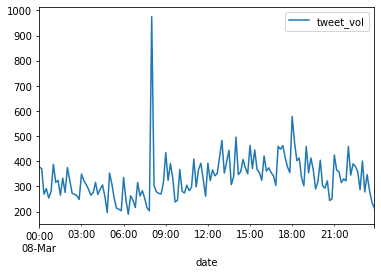

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-08.csv
(48214, 11)


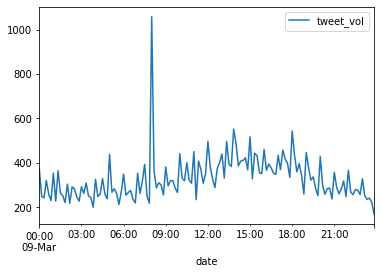

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-09.csv
(47604, 11)


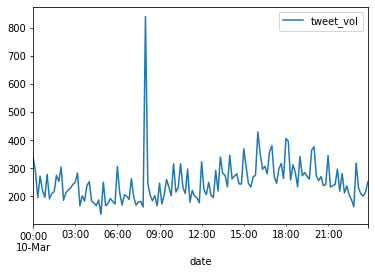

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-10.csv
(36091, 11)


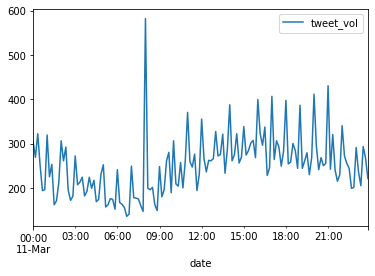

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-11.csv
(36309, 11)


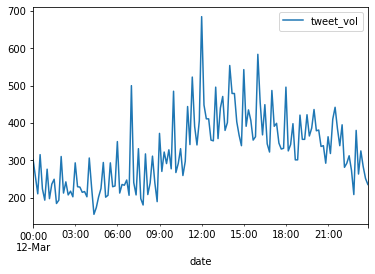

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-12.csv
(46743, 11)


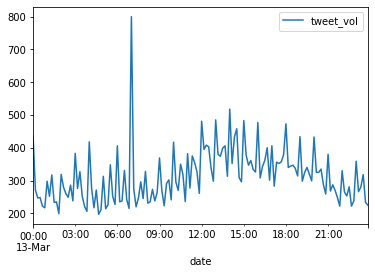

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-13.csv
(45200, 11)


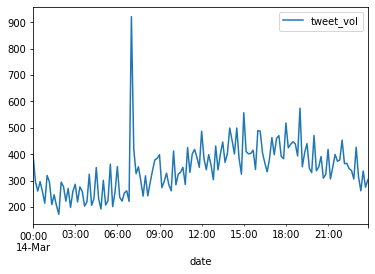

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-14.csv
(49799, 11)


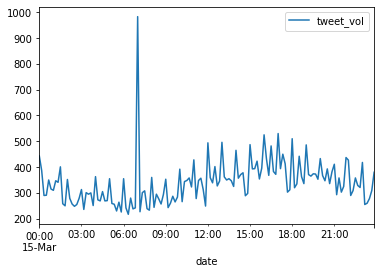

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-15.csv
(48995, 11)


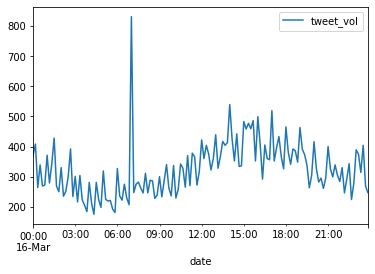

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-16.csv
(46845, 11)


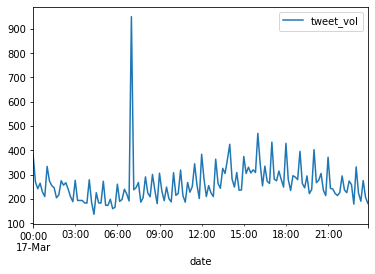

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-17.csv
(37836, 11)


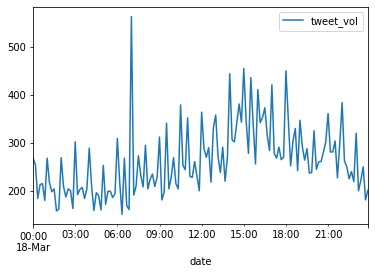

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-18.csv
(37813, 11)


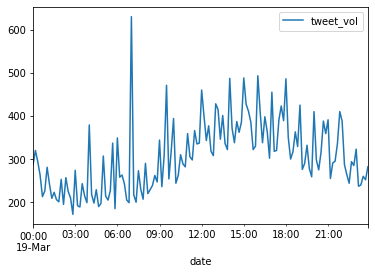

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-19.csv
(44084, 11)


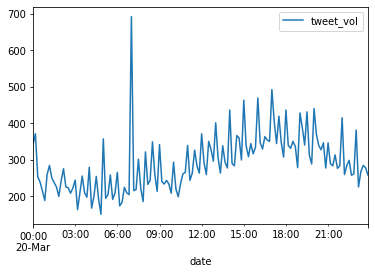

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-20.csv
(41824, 11)


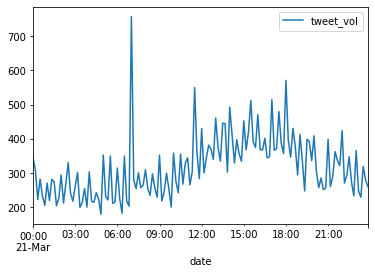

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-21.csv
(45757, 11)


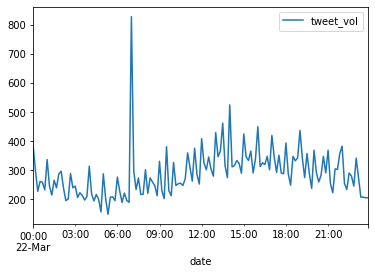

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-22.csv
(41612, 11)


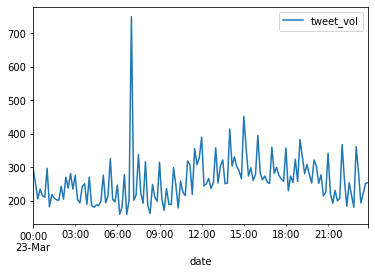

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-23.csv
(37476, 11)


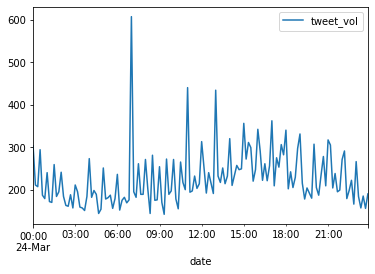

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-24.csv
(32619, 11)


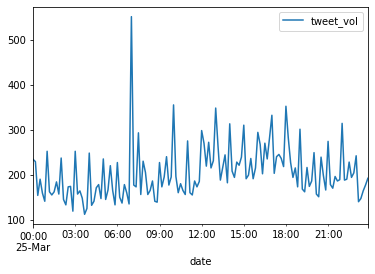

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-25.csv
(29409, 11)


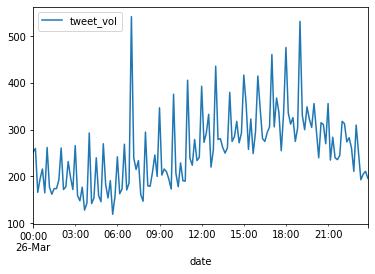

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-26.csv
(37045, 11)


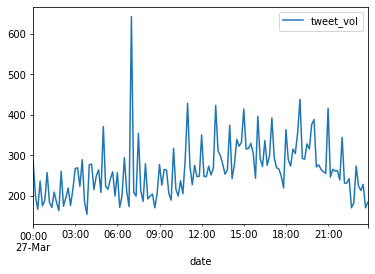

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-27.csv
(37855, 11)


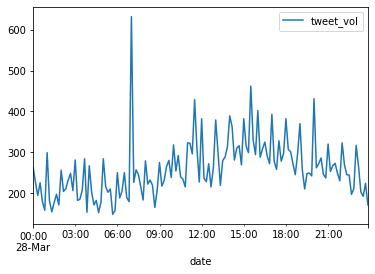

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-28.csv
(37419, 11)


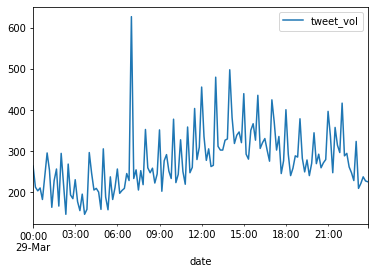

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-29.csv
(39998, 11)


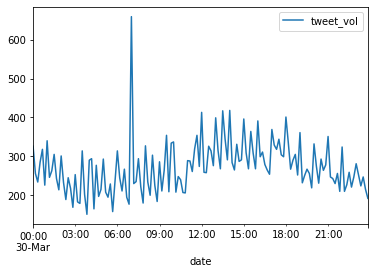

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-30.csv
(39220, 11)


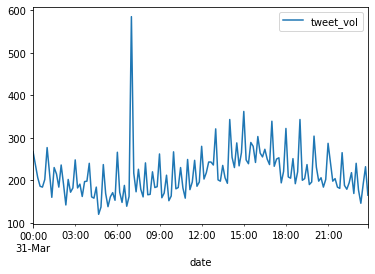

raw_data/mix/Raw/18/PART 2 complete/03 2018\2018-03-31.csv
(31121, 11)


In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

filelist = []
root_path = "raw_data/mix/Raw/18/PART 2 complete/03 2018"
#root_path = "raw_data/mix/Raw/19/Enero 2019"

for roots, dirs, files in os.walk(root_path):
    for file in files:
        filelist.append(os.path.join(roots, file))

for file_path in filelist:
    try:
        volume_data = pd.read_csv(file_path, sep=";")
    except:
        volume_data = pd.read_csv(file_path, lineterminator="\n")
    volume_data = volume_data.sort_values(by='date')
    volume_data['weight'] = 1
    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S', utc=True)
    except:
        try:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M', utc=True)
        except:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S', utc=True)
    volume_data['date'] = volume_data["date"].dt.tz_localize(None)
    volume_data = volume_data.set_index("date")

    grouped_data = volume_data.groupby(pd.Grouper(freq="10Min")).size().reset_index(name='tweet_vol')
    plt.close()
    grouped_data.plot(x='date')
    plt.show()

    print(file_path)
    print(volume_data.shape)